# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - [fornece seus dados para download](http://web.mta.info/developers/developer-data-terms.html#data) através de  arquivos CSV. Dentre as informações disponíveis estão os **registros semanais de dados das catracas do metrô**. 


Estes registros contém contagens cumulativas das entradas e saídas, normalmente agrupadas em períodos de 4 horas, com dados adicionais que permitem identificar a estação e catraca específica correspondente a cada linha do arquivo. Neste projeto iremos utilizar um desses registros, mas não precisa baixar nada agora! O primeiro exercício será escrever um código Python para fazer isso por você :-)




# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso, com tarefas básicas de aquisição e limpeza de dados. No processo iremos descobrir informações essenciais sobre os dados, utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metrô de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos dos dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que busque apoio nos canais abaixo, na seguinte ordem de prioridade:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Python e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os exercícios feitos, com atenção especial para os trechos de código a completar (sinalizados com `# your code here`), pois eles são essenciais para que o código rode corretamente
- O arquivo ipynb exportado como HTML

Para entregar este projeto envie este `.ipynb` preenchido e o HTML, zipados, na página correspondente da sala de aula.

# Sobre o dataset

Descrição das colunas
<pre>
C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
  
C/A      = Agrupamento de catracas de que a catraca faz parte (_Control Area_)
UNIT     = Cabine de controle associada à estação onde a catraca se encontra (_Remote Unit for a station_)
SCP      = Endereço específico da catraca (_Subunit Channel Position_)
STATION  = Nome da estação onde a catraca se encontra
LINENAME = Código representando todas linhas que passam na estação*
DIVISION = Código representando a concessionária original da linha, antes da prefeitura assumir a gestão   
DATE     = Representa a data (no formato MM-DD-YY) do evento de auditoria agendado
TIME     = Representa o horário (hh:mm:ss) do evento de auditoria agendado
DESc     = Descreve o tipo de evento de auditoria registrado:
           1. "REGULAR" representando um evento de auditoria padrão, em que a contagem é feita a cada 4 horas
           2. "RECOVR AUD" significa que o valor específico estava perdido, mas foi recuperado posteriormente 
           3. Diversos códigos sinalizam situações em que auditorias são mais frequentes devido a atividades de
              planejamento ou solução de problemas. 
ENTRIES  = A contagem cumulativa de entradas associadas à catraca desde o último registro
EXITS    = A contagem cumulativa de saídas associadas à catraca desde o último registro

*  Normalmente as linhas são representadas por um caractere. LINENAME 456NQR significa que os trens 4, 5, 6, N, Q e R passam pela estação.
</pre>

# Lembretes

Antes de começarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que você pode ver do lado esquerdo de uma célula de código quando foi executado pela última vez se houver um número dentro das chaves.
- Quando você inicia uma nova sessão do notebook, certifique-se de executar todas as células até o ponto em que você deixou a última vez. Mesmo que a saída ainda seja visível a partir de quando você executou as células em sua sessão anterior, o kernel começa em um estado novo, então você precisará recarregar os dados, etc. em uma nova sessão.
- O ponto anterior é útil para ter em mente se suas respostas não correspondem ao que é esperado nos questionários da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que você esteja trabalhando com as mesmas variáveis e dados que estão em cada fase do questionário.

## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_170610.txt onde 10/06/17 é a data do arquivo.

<blockquote>
    <p>Caso o site esteja fora do ar, use essa url:</p>
    <p>https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf32290_turnstile/turnstile.html</p>
</blockquote>

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [13]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import datetime as dt
from bs4 import BeautifulSoup

#url principal e alternativa como array. Se uma retornar com erro, busca os dados da outra
url = ['http://web.mta.info/developers/turnstile.html',
       'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf32290_turnstile/turnstile.html']

req = urllib.request.Request(url[0])
try:
    urllib.request.urlopen(req)
except urllib.error.HTTPError:
    req = urllib.request.Request(url[1])
    
u = urllib.request.urlopen(req)
html = u.read()

#com o retorno dos dados ok, agora é necessário extrair os dados da pagina
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a', href=True)

#seleciono os links que tem href e adiciono na lista

link = []
for i in range(len(links)):
    if '1706' in links[i].get('href'):
        link.append('http://web.mta.info/developers/' + links[i].get('href'))

#baixo os arquivos, porém ao buscar dessa forma a AWS retorna erro de permissão, porque os arquivos do mês de junho
#não estão disponíveis como os outros, forçando a colocar a url direto no array "link" ao invés de colocá-lo na função for
if url[1] == True:
    link = ['https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf32142_turnstile-170624/turnstile-170624.txt',
'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf31e03_turnstile-170617/turnstile-170617.txt',
'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf2fab0_turnstile-170610/turnstile-170610.txt',
'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf31d11_turnstile-170603/turnstile-170603.txt']
    for i in range(len(link)):
        urllib.request.urlretrieve(link[i])
else:
    for i in range(len(link)):
        urllib.request.urlretrieve(link[i], link[i][-20:])
    
#crio a variavel filenames, com o nome dos arquivos que foram baixados
filenames = []
for i in range(len(link)):
    filenames.append(link[i][-20:])
filenames.sort()

### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...

**OBS:** Note que algumas colunas foram descartadas!

In [14]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # your code here
            f = open(filename, 'r')
            lines = f.readlines()
            resultado = []
            for x in lines:
                resultado.append(str((x.split(',')[0:3]) + (x.split(',')[6:11])))
            f.close()
            del resultado[0]
            for y in range(len(resultado)):
                master_file.write((resultado[y]).replace(' ','').replace('\\n','').replace('[','').replace(']','').replace("'",''))
                master_file.write('\n')
            

#executo a funcao criada acima
create_master_turnstile_file(filenames, 'turnstile_june_all.txt')

### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [15]:
def filter_by_regular(filename):
    turnstile_data = pd.read_csv(filename)
    # more of your code here
    turnstile_data = turnstile_data[turnstile_data['DESCn'] == 'REGULAR']
    return turnstile_data


### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1. Criar uma nova coluna chamada ENTRIESn_hourly

2. Inserir nessa coluna a diferença entre ENTRIESn da linha atual e a da linha anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [55]:
#Chamo a função filter_by_regular e jogo o resultado para a variavel df
df = filter_by_regular('turnstile_june_all.txt')

#sort nessas colunas, com reset do índice porque com o select acima, perdeu a sequência original
#o sort ajudará nas próximas questões abaixo
df.sort_values(by = ['C/A', 'UNIT', 'SCP', 'ENTRIESn'], inplace=True)
df = df.reset_index(drop=True)

def get_hourly_entries(df):
    #your code here
    df['ENTRIESn_hourly'] = 1
    if df['ENTRIESn'].isnull().any():
        df['ENTRIESn'].fillna(1)
    for i in range(len(df)-1):
        conta = (df['ENTRIESn'].loc[i+1] - df['ENTRIESn'].loc[i])
        df['ENTRIESn_hourly'].loc[i+1] = conta
    return df


,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly
0,A002,R051,02-00-00,05/27/2017,00:00:00,REGULAR,6195217,2098317,1
1,A002,R051,02-00-00,05/27/2017,04:00:00,REGULAR,6195240,2098318,1
2,A002,R051,02-00-00,05/27/2017,08:00:00,REGULAR,6195256,2098347,1
3,A002,R051,02-00-00,05/27/2017,12:00:00,REGULAR,6195346,2098432,1
4,A002,R051,02-00-00,05/27/2017,16:00:00,REGULAR,6195518,2098491,1
5,A002,R051,02-00-00,05/27/2017,20:00:00,REGULAR,6195765,2098537,1
6,A002,R051,02-00-00,05/28/2017,00:00:00,REGULAR,6195898,2098559,1
7,A002,R051,02-00-00,05/28/2017,04:00:00,REGULAR,6195914,2098562,1
8,A002,R051,02-00-00,05/28/2017,08:00:00,REGULAR,6195930,2098581,1
9,A002,R051,02-00-00,05/28/2017,12:00:00,REGULAR,6196024,2098646,1


### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [91]:
df = get_hourly_entries(df)

def get_hourly_exits(df):
    df['EXITSn_hourly'] = 0
    if df['EXITSn'].isnull().any():
        df['EXITSn'].fillna(0)
    for i in range(len(df)-1):
        diff = (df['EXITSn'].loc[i+1] - df['EXITSn'].loc[i])
        df['EXITSn_hourly'].loc[i+1] = diff
    #your code here
    return df

df = get_hourly_exits(df)

### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [16]:
def time_to_hour(time):
#Decidi por colocar uma validação simples, mesmo não tendo sido solicitado no exercício
    try:
        hour = int(time[0:2])
    except ValueError:
        print('Formato inválido. Corrigir e executar novamente')
    return hour

## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [17]:
filename = pd.read_csv('turnstile_data_master_with_weather.csv', sep= ',')

#checo se a leitura está correta
filename.head(5)

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

In [18]:
def num_rainy_days(df):
    #your code here
    df_rainy = df[(df['rain'] == 1)]
    df_rainy = df_rainy['DATEn'].nunique()
    return df_rainy

#executo a função para checar se está ok
num_rainy_days(filename)

10

### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).

In [19]:
def max_temp_aggregate_by_fog(df):
    if (filename[(filename['fog'] == 0) & (filename['DATEn'] == df)].count().all()) > 0:
        foggy, stat = 0, 0
    else:
        stat = 0
        foggy = 1
        jj = filename[(filename['fog'] == 1) & (filename['DATEn'] == df)]
        stat = jj['maxtempi'].max()
        
    return foggy, stat
        
#executo a função para checar o retorno: 1 se nublado, com a temperatura máxima, e 0, caso o dia não esteja nublado
max_temp_aggregate_by_fog('2011-05-24')

(1, 81.0)

In [20]:
#executo a função com retorno para leitura mais fácil para o usuário
nublado, maxtemperatura = max_temp_aggregate_by_fog('2011-05-01')
if nublado == 0:
    print('Dia não nebuloso')
else: 
    print('Dia nublado, com temperatura máxima de {}'.format(maxtemperatura))

Dia não nebuloso


### *Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [21]:
def avg_weekend_temperature(filename):
  
    mean_temp_weekends, mean_temp = 0, 0
    contagem = 0
    #as temperaturas sao as mesmas para cada dia, mas a quantidade de registros/dia muda
    #então agrupo dia e temperatura e obtenho os valores unicos
    filenm = filename[['DATEn','meantempi']].drop_duplicates()
    
    #função datetime usada para identificar qual dia da semana é sábado ou domingo -- weekday maior que 4
    for i in range(len(filenm)):
        if dt.datetime.strptime(filenm['DATEn'].iloc[i], '%Y-%m-%d').weekday() > 4:
            mean_temp += (filenm['meantempi'].iloc[i])
            contagem += 1
    
    mean_temp_weekends = (mean_temp/contagem)
       
    return mean_temp_weekends

In [22]:
#executo a função para calcular o retorno
avg_weekend_temperature(filename)


65.11111111111111

### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [23]:
def avg_min_temperature(filename):
    jj = filename[(filename['rain'] == 1) & (filename['mintempi'] > 55)]
    avg_min_temp_rainy = jj['mintempi'].mean()
    
    return avg_min_temp_rainy

In [24]:
#executo a função para verificar o retorno
avg_min_temperature(filename)

61.238860398860396

### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

<module 'matplotlib.pyplot' from 'C:\\TEMP\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 432x288 with 0 Axes>

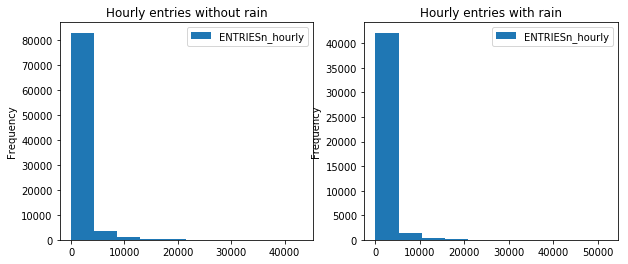

In [25]:
def entries_histogram(turnstile_weather):
    
    turnstile_weather = turnstile_weather[['ENTRIESn_hourly', 'rain']]
        
    plt.figure()
    fig, axes = plt.subplots(1, 2)
    turnstile_weather[turnstile_weather['rain'] == 0].plot(kind='hist', y='ENTRIESn_hourly', x='rain', title='Hourly entries without rain',  ax=axes[0], figsize=(8,4)) # your code here to plot a histogram for hourly entries when it is not raining
    turnstile_weather[turnstile_weather['rain'] == 1].plot(kind='hist', y='ENTRIESn_hourly', x='rain', title='Hourly entries with rain',  ax=axes[1], figsize=(10,4)) # your code here to plot a histogram for hourly entries when it is not raini

    return plt

#executo a função para checar o retorno
entries_histogram(filename)

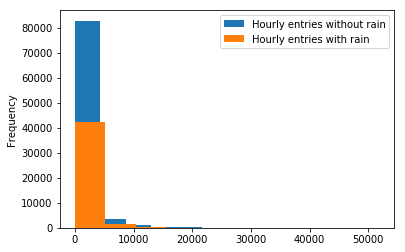

In [26]:
#Função criada para comparação de dois dados em um único gráfico. Somente como variação do primeiro, porém com os mesmos dados
def entries_histogram_unique(turnstile_weather):
    
    turnstile_weather = turnstile_weather[['ENTRIESn_hourly', 'rain']]
    
    plt.figure()
    ax = plt.gca()
    # gca significa 'get current axis' --> ploto os dois no mesmo eixo, em um só gráfico
    turnstile_weather[turnstile_weather['rain'] == 0].plot(kind='hist', y='ENTRIESn_hourly', x='rain',  ax=ax, label='Hourly entries without rain'); # your code here to plot a histogram for hourly entries when it is not raining
    turnstile_weather[turnstile_weather['rain'] == 1].plot(kind='hist', y='ENTRIESn_hourly', x='rain',  ax=ax, label='Hourly entries with rain'); # your code here to plot a histogram for hourly entries when it is not raini
    return plt

#executo a função para checar o resultado
entries_histogram_unique(filename);

<Figure size 432x288 with 0 Axes>

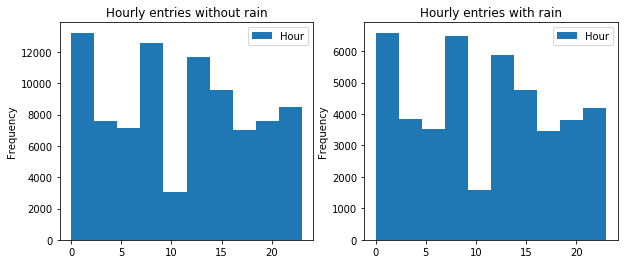

In [27]:
#decidi plotar mais um gráfico porque os de cima ficaram com distribuição simples, porque as variáveis eram 
#chuva = 1 ou 0 e entradas por hora. 
turnstile_weather = filename[['ENTRIESn_hourly', 'rain', 'DATEn', 'Hour']]
        
plt.figure()
fig, axes = plt.subplots(1, 2)
turnstile_weather[turnstile_weather['rain'] == 0].plot(kind='hist', x='ENTRIESn_hourly', y='Hour', title='Hourly entries without rain',  ax=axes[0], figsize=(8,4)); # your code here to plot a histogram for hourly entries when it is not raining
turnstile_weather[turnstile_weather['rain'] == 1].plot(kind='hist', x='ENTRIESn_hourly', y='Hour', title='Hourly entries with rain',  ax=axes[1], figsize=(10,4)); # your code here to plot a histogram for hourly entries when it is not raini


### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: <p>
Os dados não possuem uma distribuição normal, sendo que ambos apresentam picos similares e decréscimos na sequência. <p>
A distribuição dos dados fica mais próxima a uma __distribuição binomial__.<p>
__Não existe diferença na distribuição entre dias chuvosos e não chuvosos, mas a quantidade de entradas nos dias chuvosos é metade das entradas dos dias não chuvosos.__<p>


### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [28]:
def means(turnstile_weather):
    with_rain_mean = 0 
    without_rain_mean = 0

    jj_rain = turnstile_weather[(turnstile_weather['rain'] == 1)]
    with_rain_mean = jj_rain['ENTRIESn_hourly'].mean()

    jj_no_rain = turnstile_weather[(turnstile_weather['rain'] == 0)]
    without_rain_mean = jj_no_rain['ENTRIESn_hourly'].mean()
    
    return with_rain_mean, without_rain_mean # leave this line for the grader

Responda as perguntas abaixo de acordo com a saida das suas funções:

1. Qual a média das entradas com chuva?
2. Qual a média das entradas sem chuva?


In [29]:
with_r, wo_r = means(filename)
print('A média das entradas com chuva é {} e a média das entradas sem chuva é {}'.format(round(with_r,2), round(wo_r,2)))

A média das entradas com chuva é 1105.45 e a média das entradas sem chuva é 1090.28


## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [37]:
def mapper():
    
    for line in sys.stdin:
        # your code here
        data = line.strip().split(',')
        if len(data) == 22 and data[6] == 'ENTRIESn_hourly':
            continue
        print('{0}\t{1}'.format(data[1], float(data[6])))


mapper()
sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [40]:
def reducer():
    
    entries = 0.0
    oldKey = None

    for line in sys.stdin:
        data_mapped = line.strip().split("\t")
        
        if len(data_mapped) != 2:
            # Erro nessa linha. Pular.
            continue

        thisKey, thisEntry = data_mapped
    
        if oldKey and oldKey != thisKey:
            print(oldKey, "\t", float(entries))
            entries = 0

        oldKey = thisKey
        entries += float(thisEntry)

        if oldKey != None:
            print(oldKey, "\t", float(entries))
        
reducer()
sys.stdin = open('mapper_result.txt')
#sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('reducer_result.txt', 'w')